## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data_df = pd.read_csv("creditcard.csv")

In [3]:
data_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
data_df.shape

(284807, 31)

## Null Check

In [5]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
data_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
data_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Raw data input to Model Training

#### Target and Feature Split

In [9]:
X = data_df.drop(['Class'],axis=1)
y = data_df['Class']

In [10]:
X.shape

(284807, 30)

In [11]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

#### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=42)

In [13]:
X_train.shape

(199364, 30)

In [14]:
X_test.shape

(85443, 30)

In [15]:
y_train_df = pd.DataFrame(y_train)

In [16]:
y_train_df.value_counts()

Class
0        199008
1           356
dtype: int64

In [17]:
y_test_df = pd.DataFrame(y_test)

In [18]:
y_test_df.value_counts()

Class
0        85307
1          136
dtype: int64

#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [22]:
y_train_pred = classifier.predict(X_train)

In [23]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print("Training Metrics")
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Metrics
0.999899680985534
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      0.94      0.97       356

    accuracy                           1.00    199364
   macro avg       1.00      0.97      0.99    199364
weighted avg       1.00      1.00      1.00    199364



In [25]:
y_test_pred = classifier.predict(X_test)

In [26]:
print("Test Metrics")
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Metrics
0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.79      0.87       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Cross Validating the model

In [27]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [28]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=101, shuffle=True)
i = 1

for train_index , test_index in skf.split(X,y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    classifier.fit(X_train,y_train)
    pred_values = classifier.predict(X_test)
    print("metrics for fold {}".format(i))
    print(classification_report(y_test, pred_values))
    i = i+1

metrics for fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.82      0.89        99

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

metrics for fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.83        99

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.92     56962
weighted avg       1.00      1.00      1.00     56962

metrics for fold 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg     

### Explainability

###### Permutation Feature Importance

https://www.analyticsvidhya.com/blog/2021/06/beginners-guide-to-machine-learning-explainability/

It is a model inspection technique that can be used for any fitted estimator when the data is tabular. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

Algorithm

- Train a model on a dataset
- Calculate the error metrics or score(s) for the trained model for reference
- Shuffled the validation data columns values one column(features) at a time and can be repeated K times
- Using the shuffled data to evaluate the trained model using the same error or score metrics for each iteration
- The features that affect the error metrics most are the important ones as it indicates a model dependency on that features

We can use the python sklearn package for build-in permutation_importance function

In [29]:
from sklearn.inspection import permutation_importance

Now we will use the permutation_importance function on the test set to calculate the feature importance, we need to provide a trained model and number of shuffling iteration to perform (n_repeats parameter)

In [30]:
r = permutation_importance(classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=42)

The returned object, r will contain feature importance values for each feature which we can visualize using the matplotlib python library

Text(0.5, 1.0, 'Feature importance using Feature Permutation Importance')

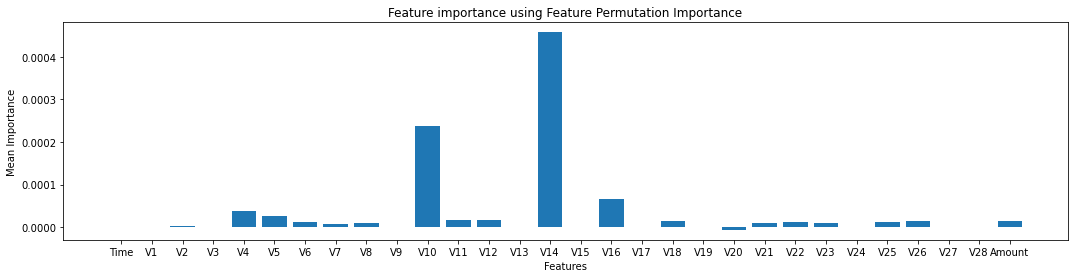

In [31]:
plt.figure(figsize=(18,4))
plt.bar(X_train.columns,r.importances_mean)
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.title('Feature importance using Feature Permutation Importance')

###### SHAP (Shapley Additive exPlanations)

https://www.advancinganalytics.co.uk/blog/2021/7/14/shap

https://analyticsindiamag.com/hands-on-guide-to-interpret-machine-learning-with-shap/

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

Machine learning is a rapidly advancing field, with many models today utilising disparate data sources, consuming outputs from other models, involving increasingly large feature inputs - all of these lead to highly complex “black-box” solutions, which are typically difficult (approaching impossible) to explain.

As people continue to research and develop different machine learning algorithms and libraries, a lot of the fine-grained detail can be lost. Many packages today allow for model defining, fitting, hyperparameter tuning and predicting in just a few lines of code, being “removed” from part of the creation process allows people to utilise models far more complex than previously. However, this can lead to a situation in which even the creators of the model may struggle to understand the “logic” behind their model. This lack of interpretability and explainability is a huge challenge when there is a need to explain the rationale behind a model’s output.

###### WHAT DOES INTERPRETABILITY AND EXPLAINABILITY IN MACHINE LEARNING MEAN? 

Interpretability has to do with how accurately a machine learning model can associate a cause (input) to an effect (output). 

Explainability on the other hand is the extent to which the internal mechanics of a machine or deep learning system can be explained in human terms. Or to put it simply, explainability is the ability to explain what is happening. 

Let’s consider a simple example illustrated below where the goal of the machine learning model is to classify an animal into its respective groups. We use an image of a butterfly as input into the machine learning model. The model would classify the butterfly as either an insect, mammal, fish, reptile or bird. Typically, most complex machine learning models would provide a classification without explaining how the features contributed to the result.  However, using tools that help with explainability, we can overcome this limitation. We can then understand what particular features of the butterfly contributed to it being classified as an insect. Since the butterfly has six legs, it is thus classified as an insect.

Being able to provide a rationale behind a model’s prediction would give the users (and the developers) confidence about the validity of the model’s decision.

As complex models are deployed in more environments, the need for regulation occurs. In areas such as medicine, insurance and finance, decision-making processes (e.g. insurance claims acceptance/rejection) need to be fair (am I being treated equally?) and transparent (how did you end up at that decision?). Tools such as SHAP can help ensure that these requirements are met.

###### WHAT IS SHAP?

SHAP is an approach based on a game theory to explain the output of machine learning models. It provides a means to estimate and demonstrate how each feature’s contribution influence the model. SHAP values are calculated for each feature, for each value present, and approximate the contribution towards the output given by that data point. It’s worth noting, that the same values of a feature can contribute different amounts towards an output, depending on the other feature values for that row.

This method approximates the individual contribution of each feature, for each row of data. It approximates the contribution of that feature by estimating the model output without using it versus all the models that do include it. As this is applied to each row of data in our training set, we can use this to observe both granular (row-level) and higher-level behaviours of certain features.

###### SHAP summary plot

In [33]:
import shap

In [34]:
explainer = shap.TreeExplainer( classifier )

We want to interpret/explain the new data (test data) predictions so using test data for explanation. Is that right though....?

In [35]:
# Create a pandas mirror of the test set (feature_cols was created in the VectorAssembler stage)
# We use this with the SHAP package.
X = X_test
shap_values = explainer.shap_values( X )
exp_values = explainer.expected_value

In [36]:
exp_values

array([0.99826155, 0.00173845])

All of the features are listed in y-axis in the rank order, the top one being the most contributor to the predictions and the bottom one being the least or zero-contributor.

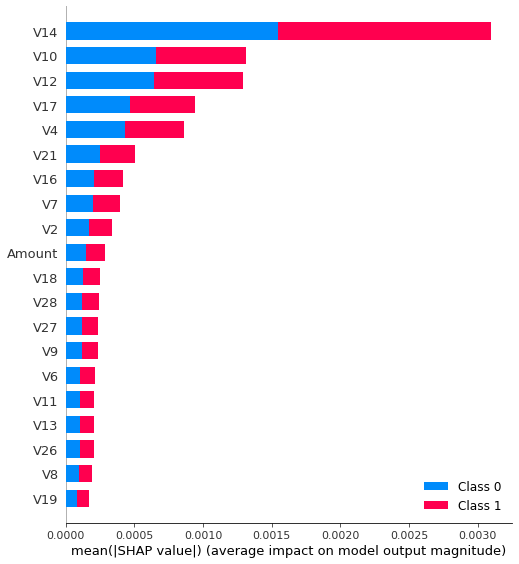

In [37]:
# Produce high-level summary plot.
shap.summary_plot( shap_values, X )

The above figure is for a classification model, so we have class 0 and class 1 mean SHAP values. However, if it was a regression problem, there will be no class and only positive and negative mean SHAP values will be present which will show how much impact that feature has on the model output. For regression, consider the following explanation.

The plot above represents every data point in our dataset. It plots a single SHAP value (x-axis) for every data point in our dataset. Each “row” (y-axis) of the chart points to the feature on the left-hand-side, and is coloured proportionally based on the feature value - high values for that feature are red, and low values for that feature are blue. Values further to the right are having a “positive” impact on the output, and values further to the left are having a “negative” impact on the output. Positive and negative here are simply direction terms, and relate to the direction in which the model’s output is affected, this has no indication on performance.

As an example, the furthest left point for close_m1 is a low value for that feature, as it is coloured blue. This low value for close_m1 impacted the output of the model by approximately a flat -700. In essence, the model without that feature, would have predicted a value o 700 higher. 

In [38]:
shap_values

[array([[-5.45630973e-05,  1.57457082e-05,  4.24556048e-05, ...,
          5.43597814e-05, -3.01053289e-05,  3.33834716e-05],
        [-6.82461677e-05, -2.53204862e-05, -1.08755895e-04, ...,
         -1.13543506e-04, -7.74685273e-05,  4.01583874e-05],
        [-3.20219972e-04,  7.43859520e-06,  4.61755133e-05, ...,
          3.48435274e-05,  1.08772452e-05,  2.97418035e-05],
        ...,
        [-4.15017570e-05, -5.30644484e-07, -1.57829637e-06, ...,
          3.74463658e-05,  2.56050561e-05,  2.24480228e-05],
        [-6.00303845e-05,  3.32877693e-05,  4.46129442e-05, ...,
          2.79320864e-05, -1.33810074e-05,  2.31509736e-05],
        [-3.69082132e-05,  1.43524266e-05,  2.84758884e-05, ...,
         -4.01140568e-05, -1.36897133e-05,  1.15274346e-04]]),
 array([[ 5.45630973e-05, -1.57457082e-05, -4.24556048e-05, ...,
         -5.43597814e-05,  3.01053289e-05, -3.33834716e-05],
        [ 6.82461677e-05,  2.53204862e-05,  1.08755895e-04, ...,
          1.13543506e-04,  7.74685273e

If the shap value is much closer to zero, we can say that the data point contributes very little to predictions. If the shap value is a strong positive or strong negative value, we can say that the data point greatly contributes to predicting the positive or negative class.

###### SHAP dependence plot

Dependence plots can be of great use while analyzing feature importance and doing feature selection. It makes one-versus-one plot against two features by plotting shap values of one feature and coloring the dots with respect to another interactive feature.

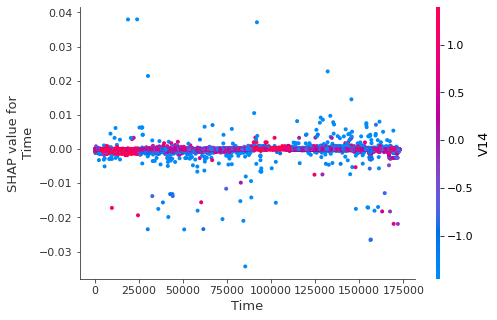

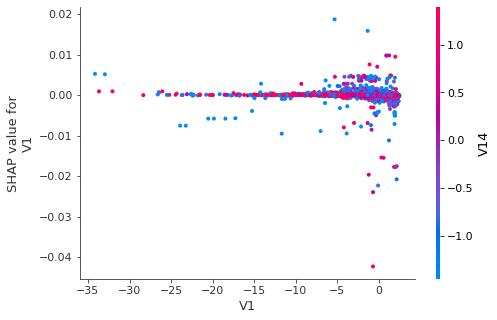

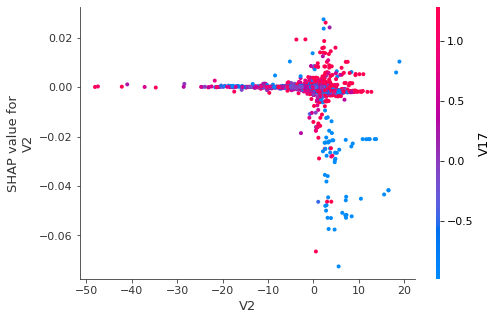

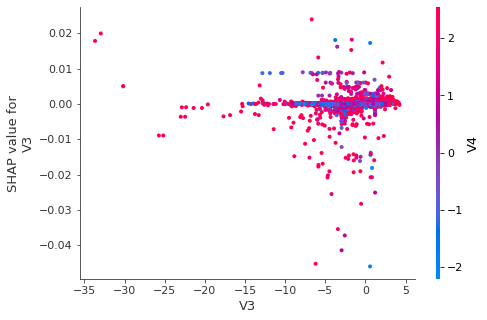

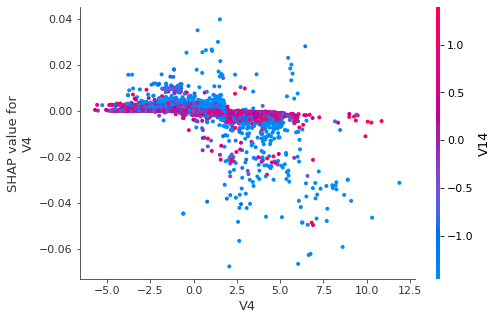

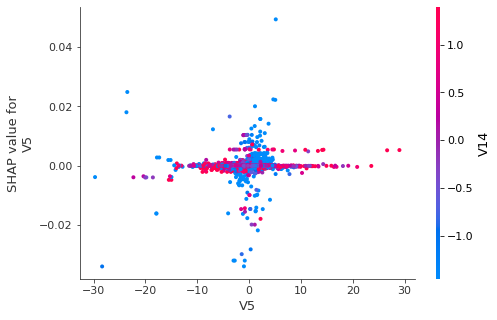

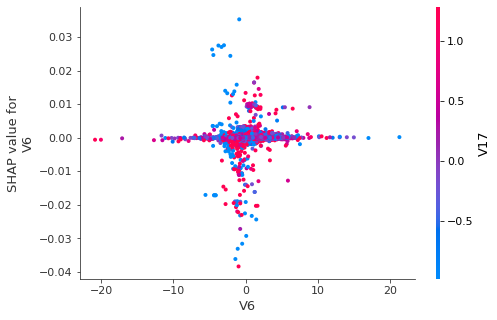

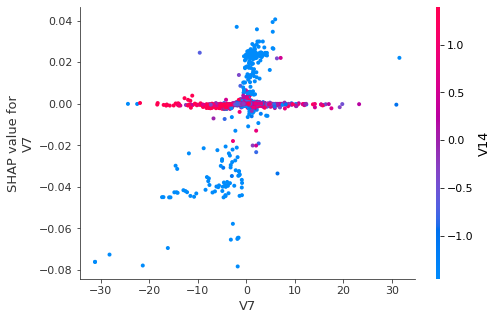

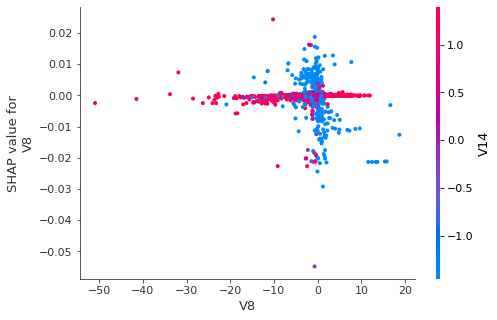

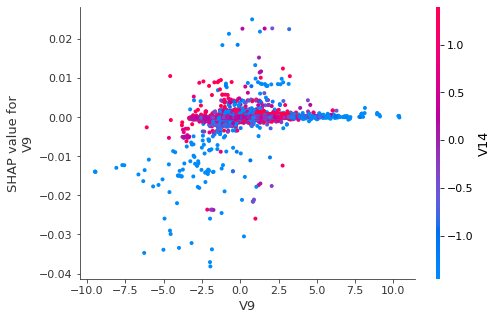

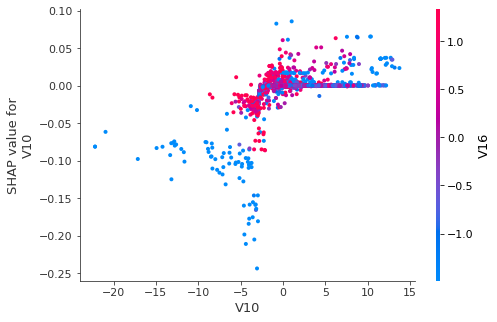

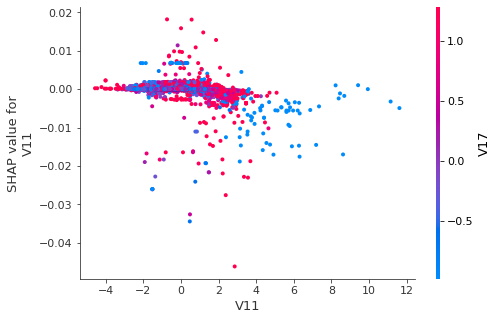

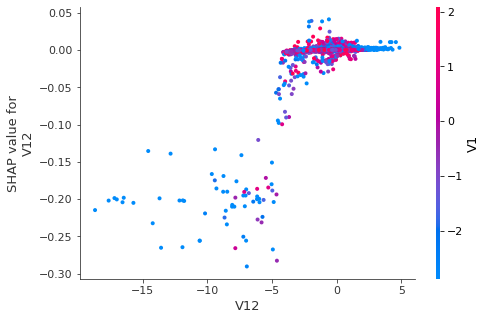

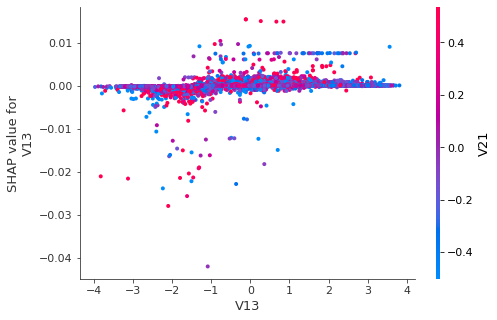

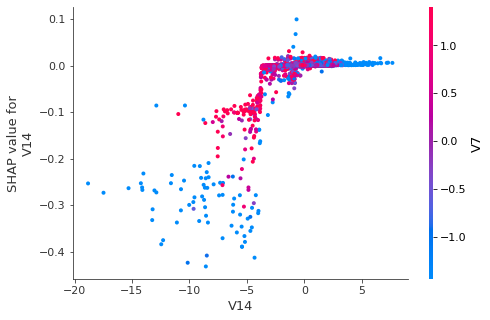

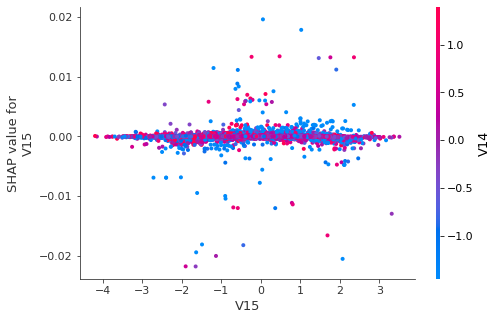

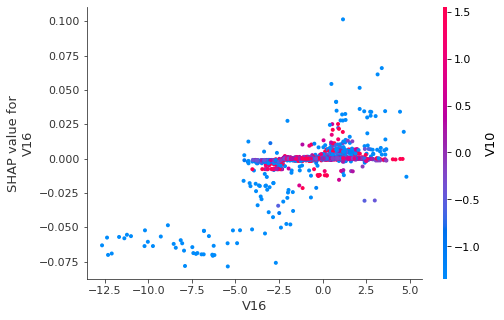

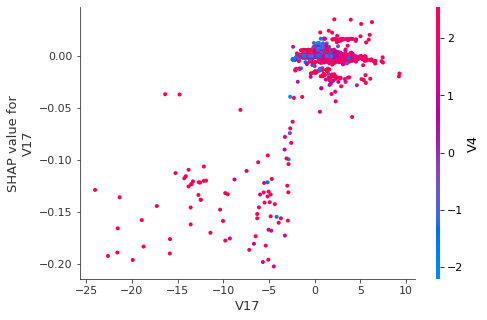

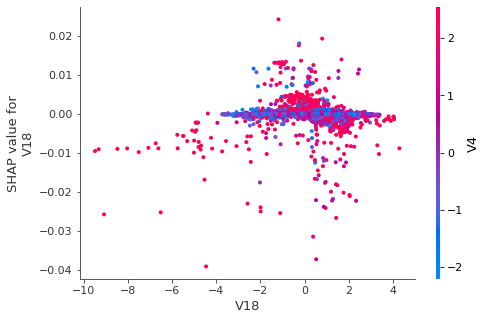

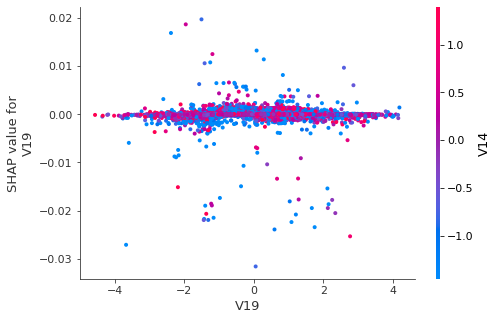

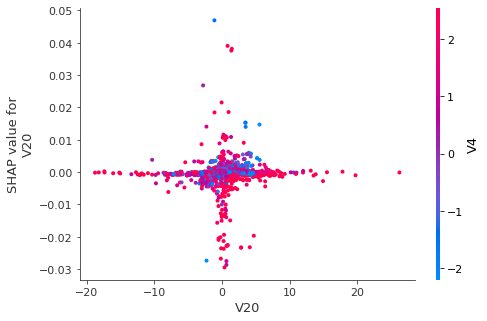

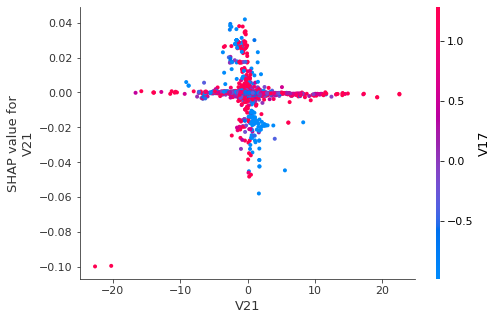

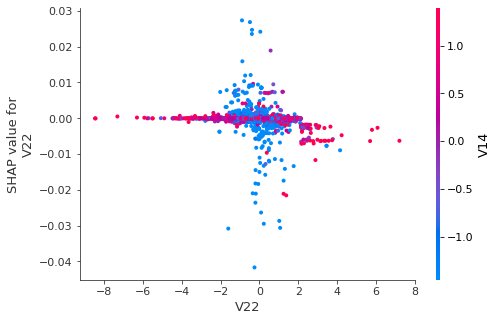

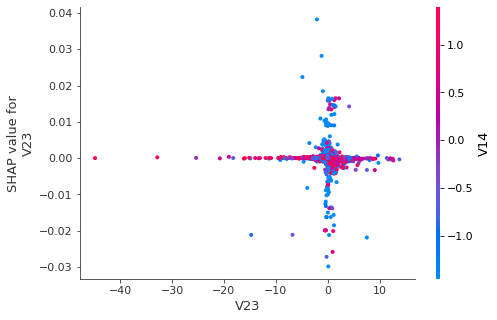

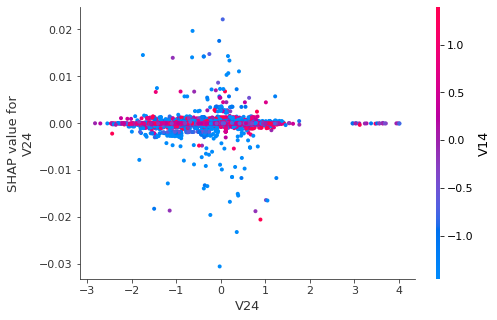

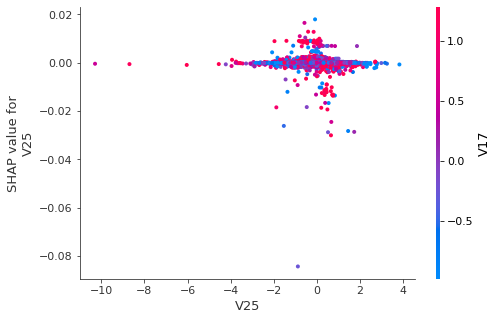

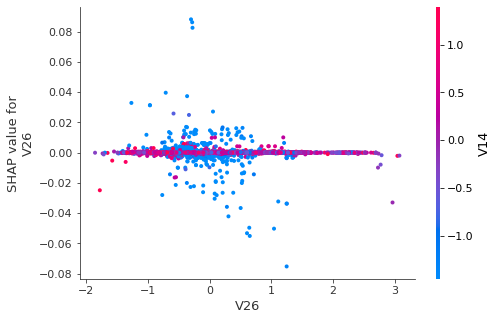

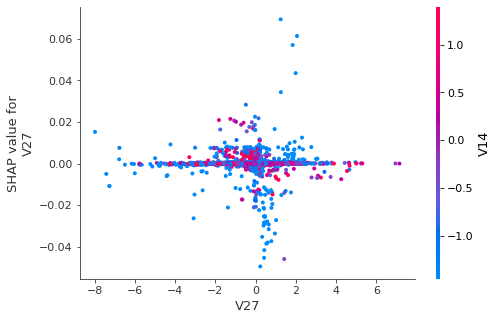

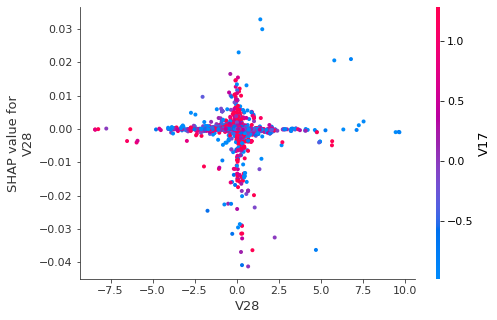

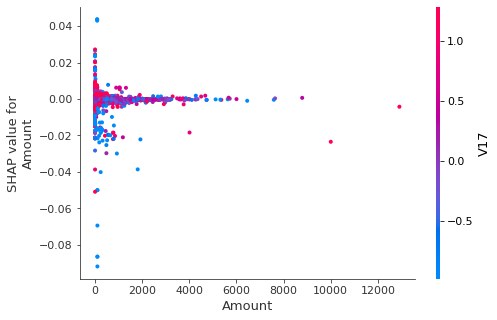

In [39]:
# plot for each feature
# Loop through columns and create dependence plots.
# Dependence plot colors the plot by choosing the variable the current variable interacts with the most
# The r.h.s value (coloured by) is automatically selected by the SHAP library.
for column in X_test.columns:
    shap.dependence_plot( column, shap_values[0], X )

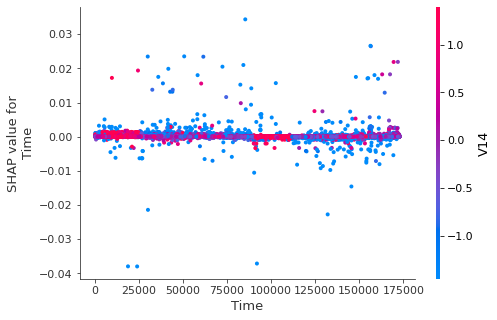

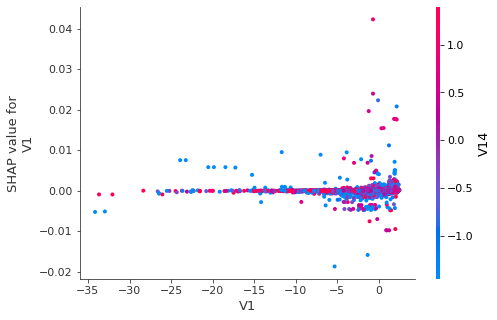

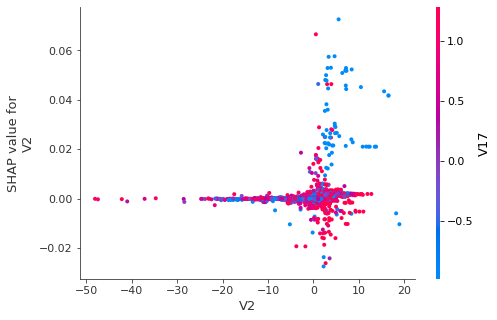

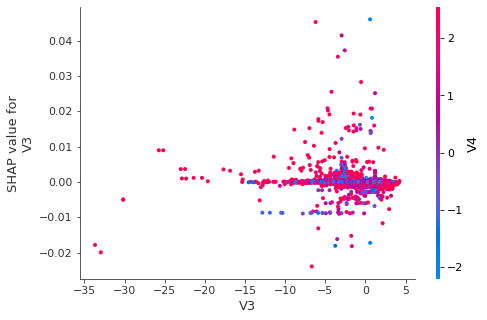

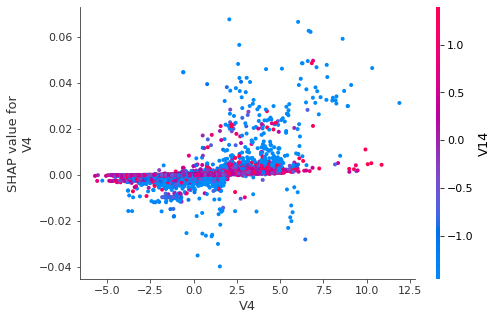

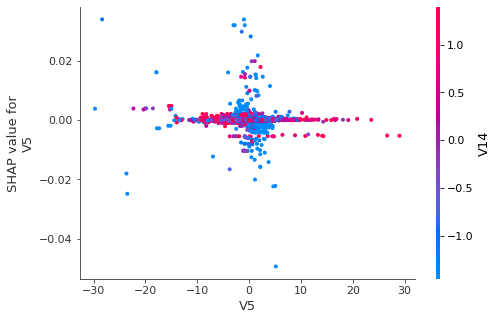

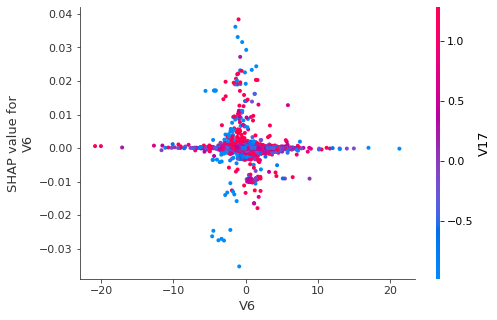

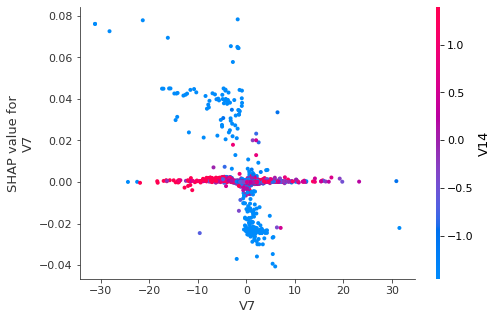

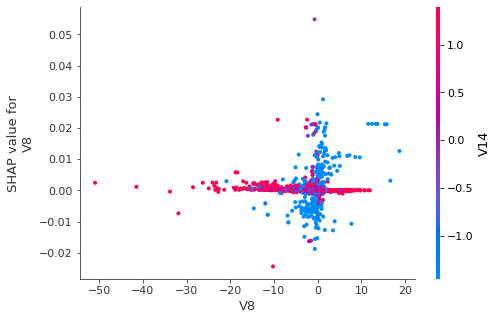

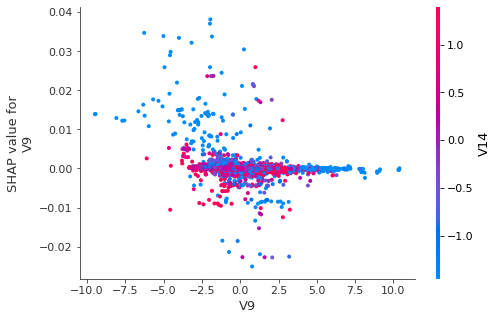

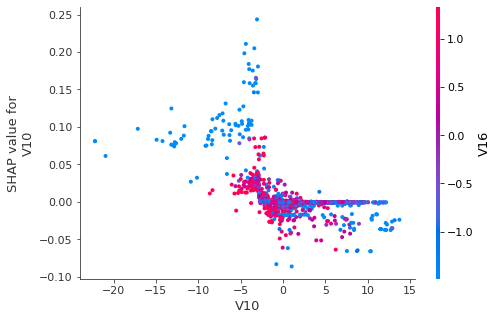

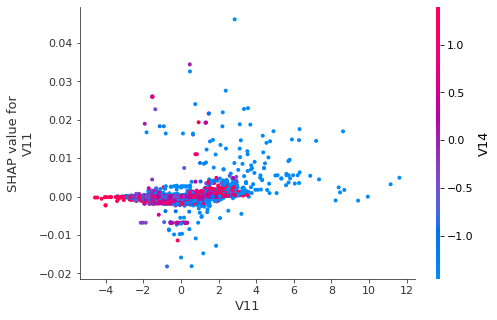

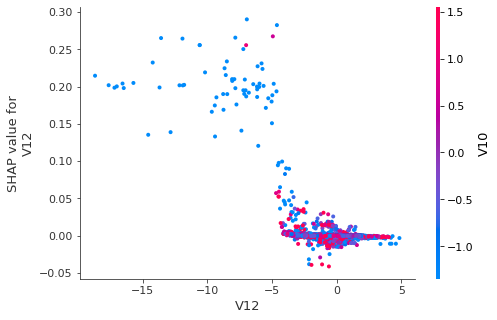

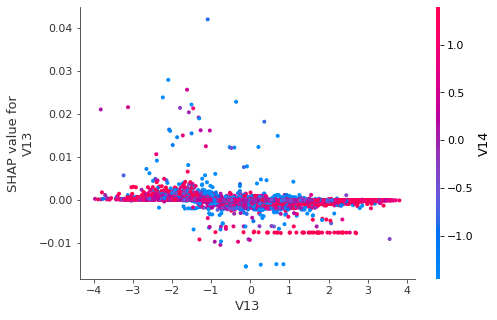

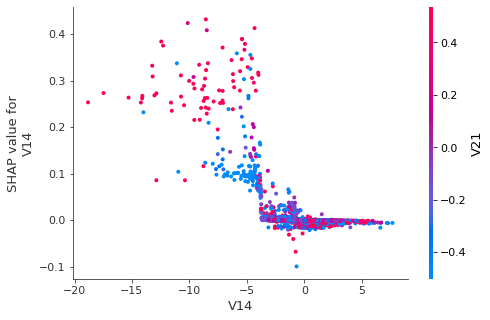

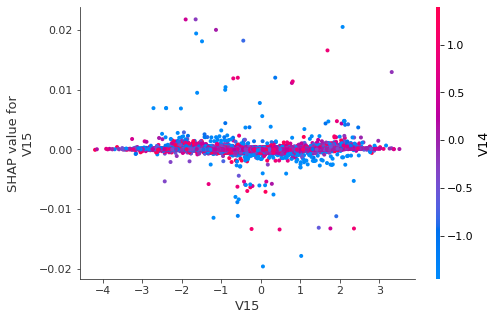

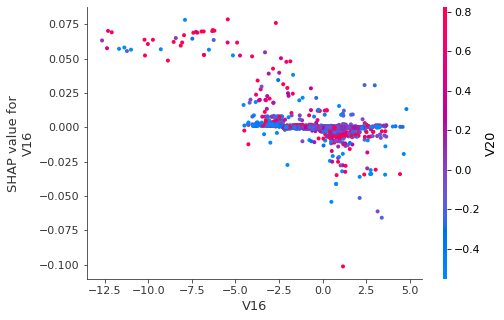

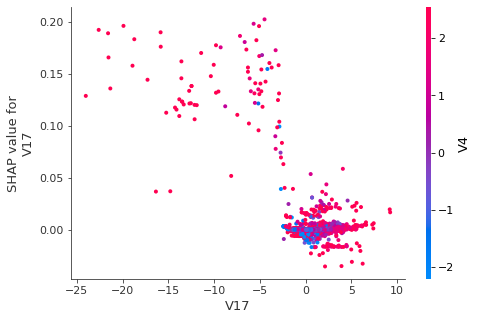

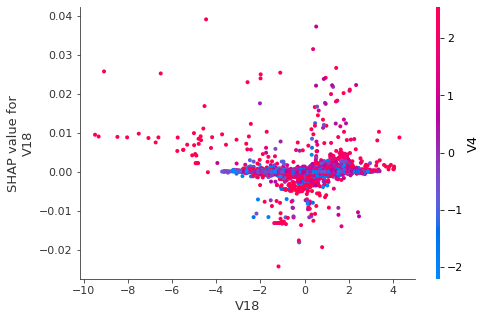

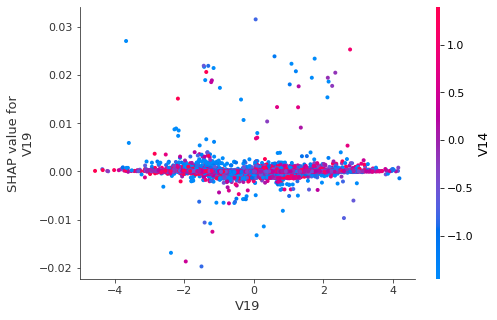

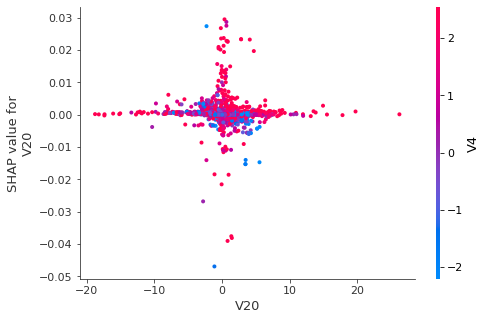

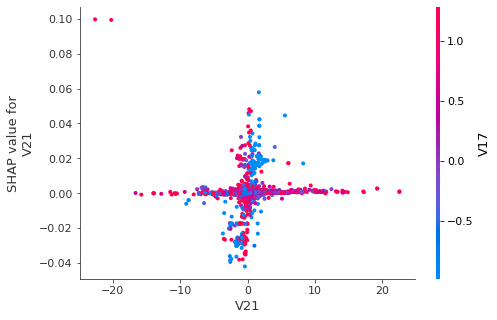

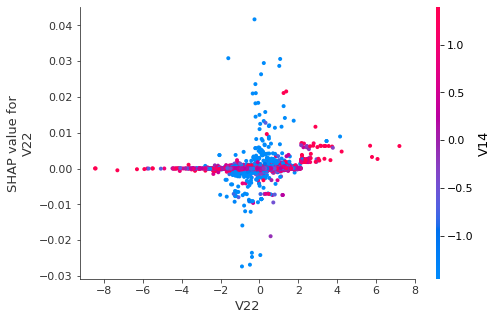

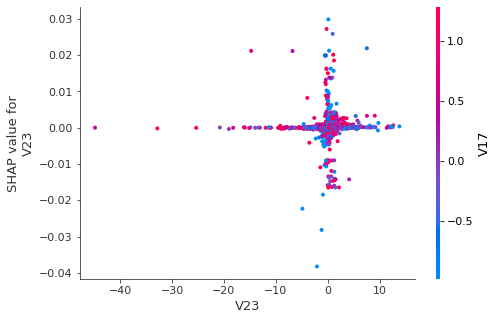

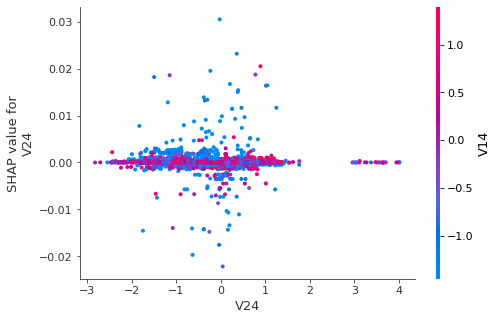

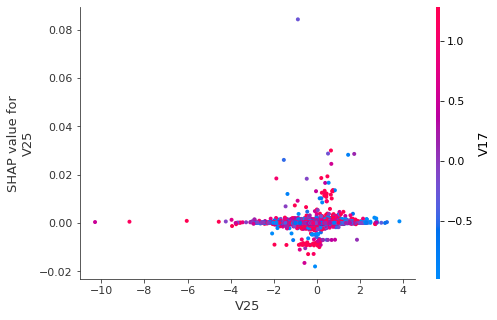

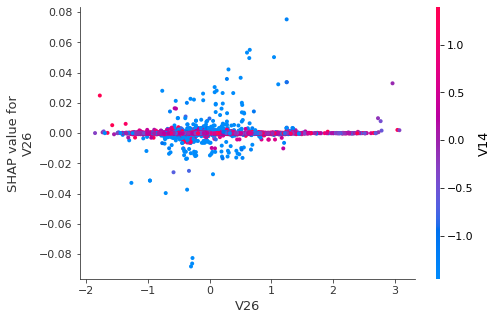

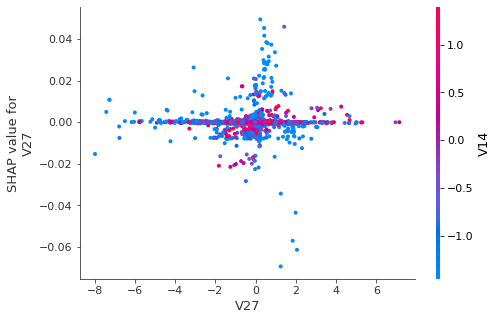

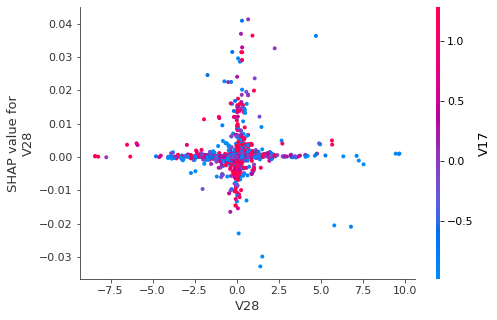

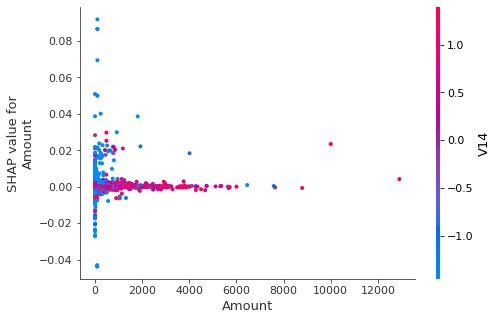

In [40]:
for column in X_test.columns:
    shap.dependence_plot( column, shap_values[1], X )

We have two plots above as there are two classes 0 and 1 in the model. This is the case for classification? In regression, there was no need to specify [0] or [1] next to shap_values...

Shap values are arrays of a length corresponding to the number of classes in target. Here the problem is binary classification, and thus shap values have two arrays corresponding to either class.

Shap values are floating-point numbers corresponding to data in each row corresponding to each feature. Shap value represents the contribution of that particular data point in predicting the outputs. 

The above graphs plot SHAP value for feature (y-axis) against value for feature (x-axis) and is coloured by some other feature. For the top chart, we can observe a trend, where same values (of time at 50000) have different impact on the output. The colouring also demonstrates a similar trend when comparing it to V14.

###### SHAP force plot

The final few lines of code produces the “force_plot” output from SHAP, where we can observe the impact each feature in a given row has on the model.

Force plots are suitable for row-wise SHAP analysis. It takes in a single row and shows in a rank order how each of the features contributed to the prediction. Wider a feature’s block, more the contribution.

In [41]:
print(classifier.predict(X_test.iloc[0:5,:]))

[0 0 0 0 0]


In [42]:
shap.initjs()

In [43]:
# Loop through a few rows and plot the individual rows' contributions.
# contribution_threshold = 0.1 just limits the names/values displayed.
for i in range( 0, 5 ):
    shap_obs = shap.force_plot( exp_values[1], shap_values[1][i], X.iloc[i,:], contribution_threshold = 0.1 )
    display( shap_obs )

In [44]:
# Loop through a few rows and plot the individual rows' contributions.
# contribution_threshold = 0.1 just limits the names/values displayed.
for i in range( 0, 5 ):
    shap_obs = shap.force_plot( exp_values[0], shap_values[0][i], X.iloc[i,:], contribution_threshold = 0.1 )
    display( shap_obs )

Force plots are suitable for row-wise SHAP analysis. It takes in a single row and shows in a rank order how each of the features contributed to the prediction. Wider a feature’s block, more the contribution.

###### SHAP decision plot

Finally, we discuss the decision plot. As the summary plot, it gives an overall picture of contribution to prediction. From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values. It can be observed that certain strings colored in blue resulted in final class value 0 and the remaining strings colored in red resulted in final class value 1.

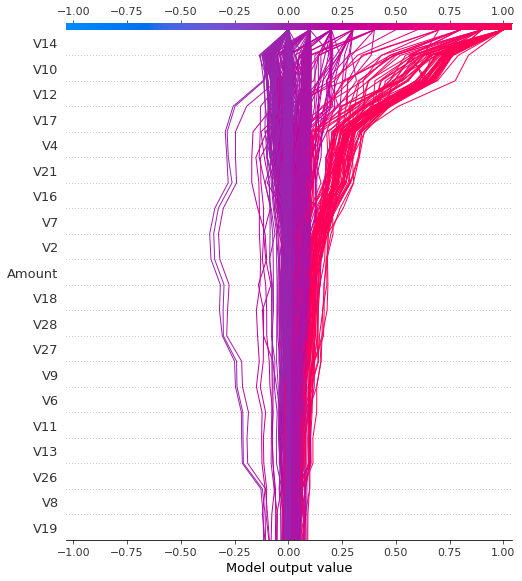

In [45]:
shap.decision_plot(exp_values[1], shap_values[1], X, ignore_warnings=True)

###### LIME (Local Interpretation Model-agnostic Explanation)

https://www.geeksforgeeks.org/introduction-to-explainable-aixai-using-lime/

The beauty of LIME its accessibility and simplicity. The core idea behind LIME though exhaustive is really intuitive and simple! Let’s dive in and see what the name itself represents:

Model agnosticism refers to the property of LIME using which it can give explanations for any given supervised learning model by treating as a ‘black-box’ separately. This means that LIME can handle almost any model that exists out there in the wild!

Local explanations mean that LIME gives explanations that are locally faithful within the surroundings or vicinity of the observation/sample being explained.

Though LIME limits itself to supervised Machine Learning and Deep Learning models in its current state, it is one of the most popular and used XAI methods out there. With a rich open-source API, available in R and Python, LIME boasts a huge user base, with almost 8k stars and 2k forks on its Github repository.

###### How LIME works

Broadly speaking, when given a prediction model and a test sample, LIME does the following steps:

Sampling and obtaining a surrogate dataset: LIME provides locally faithful explanations around the vicinity of the instance being explained. By default, it produces 5000 samples(see the num_samples variable) of the feature vector following the normal distribution. Then it obtains the target variable for these 5000 samples using the prediction model, whose decisions it’s trying to explain.

Feature Selection from the surrogate dataset: After obtaining the surrogate dataset, it weighs each row according to how close they are from the original sample/observation. Then it uses a feature selection technique like Lasso to obtain the top important features.

LIME also employs a Ridge Regression model on the samples using only the obtained features. The outputted prediction should theoretically be similar in magnitude to the one outputted by the original prediction model. This is done to stress the relevance and importance of these obtained features.

###### LIME tabular explainer

We’ll be using a tabular dataset for our analysis. To tackle such datasets, LIME’s API offers the LimeTabularExplainer.

Syntax: lime.lime_tabular.LimeTabularExplainer(training_data, mode,  feature_names, verbose)

Parameters:

training_data – 2d array consisting of the training dataset
mode – Depends on the problem; “classification” or “regression”
feature_names – list of titles corresponding to the columns in the training dataset. If not mentioned, it uses the column indices.
verbose – if true, print local prediction values from the regression model trained on the samples using only the obtained features


Once instantiated, we’ll use a method from the defined explainer object to explain a given test sample.

Syntax: explain_instance(data_row, predict_fn, num_features=10, num_samples=5000)

Parameters:

data_row – 1d array containing values corresponding to the test sample being explained
predict_fn – Prediction function used by the prediction model
num_features – maximum number of features present in explanation
num_samples – size of the neighborhood to learn the linear model

For the sake of brevity and conciseness, only some of the arguments have been mentioned in the above two syntaxes. The rest of the arguments, most of which default to some cleverly optimized values, can be checked out by the interested reader at the official LIME documentation.

In [46]:
#Krish's code for LIME implementation
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [47]:
print(classifier.predict(X_test.iloc[0:5,:]))

[0 0 0 0 0]


In [48]:
X_test.iloc[0]

Time       2.000000
V1        -1.158233
V2         0.877737
V3         1.548718
V4         0.403034
V5        -0.407193
V6         0.095921
V7         0.592941
V8        -0.270533
V9         0.817739
V10        0.753074
V11       -0.822843
V12        0.538196
V13        1.345852
V14       -1.119670
V15        0.175121
V16       -0.451449
V17       -0.237033
V18       -0.038195
V19        0.803487
V20        0.408542
V21       -0.009431
V22        0.798278
V23       -0.137458
V24        0.141267
V25       -0.206010
V26        0.502292
V27        0.219422
V28        0.215153
Amount    69.990000
Name: 4, dtype: float64

In [49]:
exp = interpretor.explain_instance(
    data_row=X_test.iloc[0], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

In [50]:
X_test.iloc[1]

Time      10.000000
V1         0.384978
V2         0.616109
V3        -0.874300
V4        -0.094019
V5         2.924584
V6         3.317027
V7         0.470455
V8         0.538247
V9        -0.558895
V10        0.309755
V11       -0.259116
V12       -0.326143
V13       -0.090047
V14        0.362832
V15        0.928904
V16       -0.129487
V17       -0.809979
V18        0.359985
V19        0.707664
V20        0.125992
V21        0.049924
V22        0.238422
V23        0.009130
V24        0.996710
V25       -0.767315
V26       -0.492208
V27        0.042472
V28       -0.054337
Amount     9.990000
Name: 11, dtype: float64

In [51]:
exp = interpretor.explain_instance(
    data_row=X_test.iloc[1], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)